# **Data Science Track: Course 15**
# **Exploratory Data Analysis Part-2**

# Chap 1: Optimal parameters

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from bokeh.sampledata.iris import flowers as df

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

### Checking Normality of Michelson data

In [3]:
# Checking Normality of Michelson data 
michelson_speed_of_light = pd.read_csv('datasets/michelson_speed_of_light.csv',index_col=0)
michelson_speed_of_light = michelson_speed_of_light['velocity of light in air (km/s)']

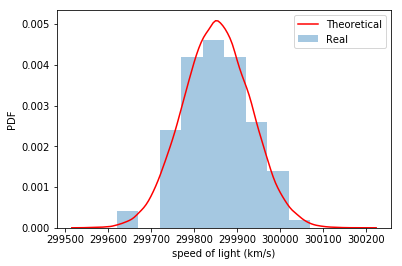

In [4]:
# Plot the histogram with default number of bins; label your axes
#ax = plt.plot()
sns.distplot(michelson_speed_of_light, bins=9, 
             kde=False,norm_hist=True, label='Real')
plt.xlabel('speed of light (km/s)')
plt.ylabel('PDF')
# Theoretical graph
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
theoretical = np.random.normal(mean,std,100000)
sns.distplot(theoretical, color='red', hist=False, 
             label='Theoretical', hist_kws=dict(edgecolor="k", linewidth=2));    
# Show the plot
plt.show()

In [5]:
# If std differ by 50%
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light) *1.5
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

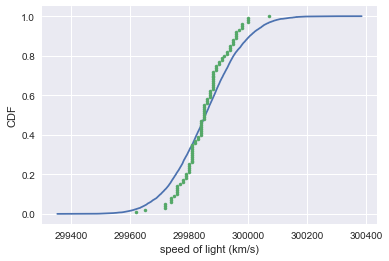

In [6]:
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()

In [7]:
# EXERCISE
# How often do we get no-hitters?

In [8]:
#d=pd.read_csv('mlb_nohitters.csv') # COULDN'T FIND THE DESIRED DATA
nohitter_times = [ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467]

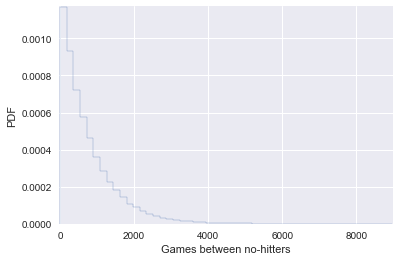

In [9]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.margins(0.005)
plt.show()


In [10]:
# EXERCISE
# Do the data follow our story?

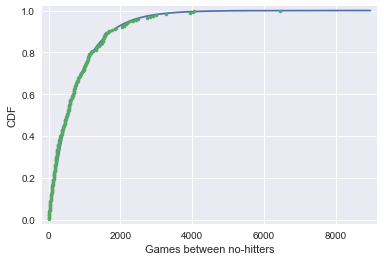

In [11]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

In [12]:
# EXERCISE
# How is this parameter optimal?

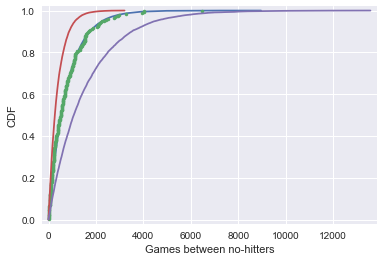

In [13]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau,size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

### Linear regression by least squares

In [ ]:
# 2008 US swing state election results

In [14]:
df_swing = pd.read_csv('datasets/2008_swing_states.csv')
total_votes = df_swing['total_votes'].values
dem_share = df_swing['dem_share'].values

In [15]:
# Finding correlation coefficients
np.corrcoef(x=total_votes.T,y=dem_share.T)

array([[ 1.        ,  0.53619736],
       [ 0.53619736,  1.        ]])

In [16]:
# and correlation matrix for the whole table
df_swing.corr()

,total_votes,dem_votes,rep_votes,dem_share
total_votes,1.000000,0.983126,0.957690,0.536197
dem_votes,0.983126,1.000000,0.888911,0.574881
rep_votes,0.957690,0.888911,1.000000,0.436138
dem_share,0.536197,0.574881,0.436138,1.000000


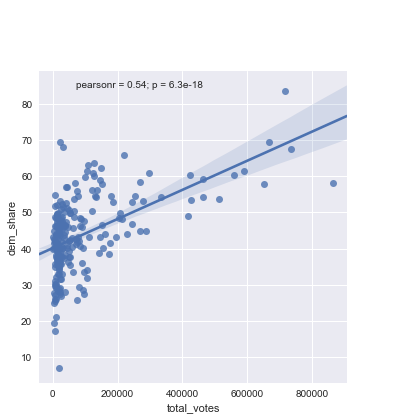

In [17]:
# Draw it using sns
from scipy import stats
g = sns.JointGrid("total_votes", "dem_share", data=df_swing)
g.plot_joint(sns.regplot)
g.annotate(stats.pearsonr)
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
plt.show()

In [18]:
# Draw the graph as in the slides

In [19]:
slope, intercept = np.polyfit(total_votes,dem_share,1)
slope, intercept

(4.0370717009465684e-05, 40.113911968641744)

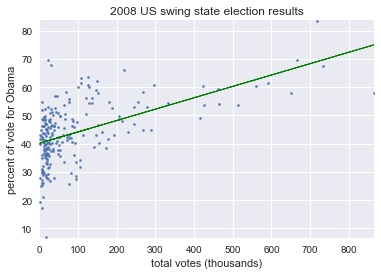

In [20]:
sns.set()
plt.scatter(x=df_swing['total_votes']/1000,
            y='dem_share',data=df_swing,
            s=20,marker='.')
plt.xlabel('total votes (thousands)')
plt.ylabel('percent of vote for Obama')
plt.title('2008 US swing state election results')
plt.plot(df_swing['total_votes']/1000,
         (df_swing['total_votes'])*slope+intercept, 
         color='green',linewidth=1)
plt.margins(0.002)
plt.show()

In [21]:
# EXERCISES

In [22]:
# EDA of literacy/fertility data
literacy = pd.read_csv('datasets/female_literacy_fertility.csv')
illiteracy = 100 - literacy['female literacy']
fertility = literacy['fertility']

In [23]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

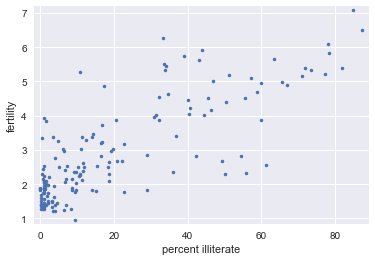

0.804132402682


In [24]:
# EDA of literacy/fertility data
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


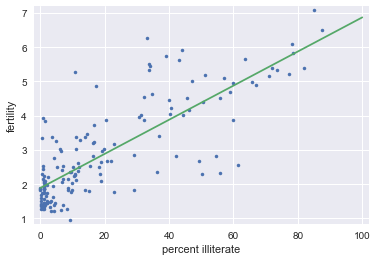

In [25]:
# Linear regression
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = x * a + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

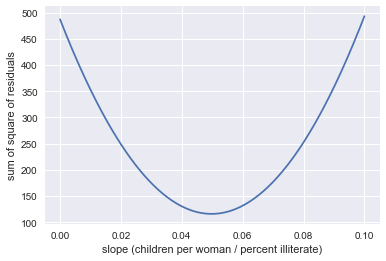

In [26]:
# How is it optimal?
# Plot RSS (residual sum of squares) versus the slope parameter a
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()
# loss is minimum for the value that was returned by polyfit.

### The importance of EDA: Anscombe's quartet

In [27]:
# EXERCISES

In [28]:
# Linear regression on appropriate Anscombe data
anscombe = pd.read_csv('datasets/anscombe.csv',header=1)
x = anscombe.x
y = anscombe.y

0.500090909091 3.00009090909


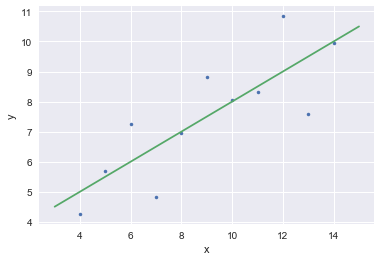

In [29]:
# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = x_theor * a + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.plot(x_theor,y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


In [30]:
# Linear regression on all Anscombe data
x1 = anscombe['x'].values
x2 = anscombe['x.1'].values
x3 = anscombe['x.2'].values
x4 = anscombe['x.3'].values
y1 = anscombe['y'].values
y2 = anscombe['y.1'].values
y3 = anscombe['y.2'].values
y4 = anscombe['y.3'].values

anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

In [31]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.500090909091 intercept: 3.00009090909
slope: 0.5 intercept: 3.00090909091
slope: 0.499727272727 intercept: 3.00245454545
slope: 0.499909090909 intercept: 3.00172727273


# Chap 2: Bootstrap confidence intervals

### Generating bootstrap replicates

In [32]:
# Michelson's speed of light measurements 
michelson_speed_of_light = pd.read_csv('datasets/michelson_speed_of_light.csv',index_col=0)
michelson_speed_of_light = michelson_speed_of_light['velocity of light in air (km/s)']

In [33]:
# Computing a bootstrap replicate
bs_sample = np.random.choice(michelson_speed_of_light, size=100)
np.mean(bs_sample), np.median(bs_sample), np.std(bs_sample)

(299856.59999999998, 299860.0, 75.792084019374997)

In [34]:
# EXERCISES

In [35]:
# Visualizing bootstrap samples
rainfall = pd.read_csv('datasets/sheffield_weather_station.csv',header=8,sep='\s+',usecols=['rain'])['rain'].values
rainfall

array([ 122.1,   69.8,   29.6, ...,   65.8,   58.2,  130.4])

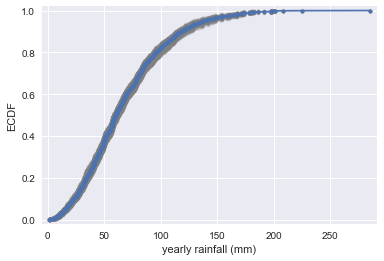

In [36]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

### Bootstrap confidence intervals

In [37]:
# Bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [38]:
# Many bootstrap replicates
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(
        michelson_speed_of_light, np.mean)

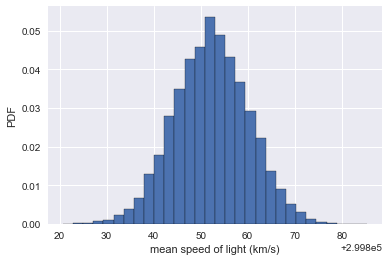

In [39]:
# Plotting a histogram of bootstrap replicates
_ = plt.hist(bs_replicates, bins=30, normed=True,ec='k')
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')
plt.show()

In [40]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([ 299837.3,  299867.7])

In [41]:
# EXERCISES

In [42]:
# Generating many bootstrap replicates Function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

0.948859357468
0.946885565501


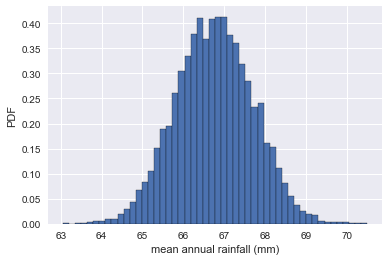

In [43]:
# Bootstrap replicates of the mean and the SEM

# compute a bootstrap estimate of the PDF of the mean 
# annual rainfall at the Sheffield Weather Station

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.mean,10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True,ec='k')
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [44]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([ 64.93098315,  68.57834582])

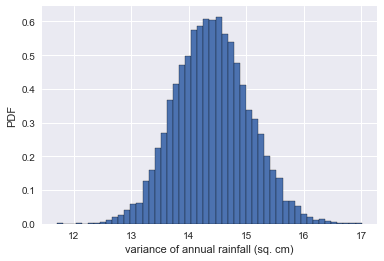

In [45]:
# Bootstrap replicates of other statistics
# variance of the annual rainfall at the Sheffield Weather Station

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.var,10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True,ec='k')
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

95% confidence interval = [ 665.26633466  872.11035857] games


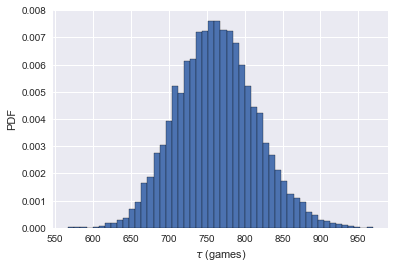

In [46]:
# Confidence interval on the rate of no-hitters
# Draw bootstrap replicates of the mean no-hitter time 
# (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times,np.mean,10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True,ec='k')
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Pairs bootstrap

In [47]:
# Generating a pairs bootstrap sample

In [48]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [49]:
inds = np.arange(len(total_votes))

In [50]:
bs_inds = np.random.choice(inds, len(inds))

In [51]:
bs_total_votes = total_votes[bs_inds]

In [52]:
bs_dem_share = dem_share[bs_inds]

In [53]:
# Computing a pairs bootstrap replicate

In [54]:
bs_slope, bs_intercept = np.polyfit(bs_total_votes,bs_dem_share, 1)
bs_slope, bs_intercept

(4.211077670682085e-05, 39.702930882341079)

In [55]:
np.polyfit(total_votes, dem_share, 1) # fit of original

array([  4.03707170e-05,   4.01139120e+01])

In [56]:
# EXERCISES

In [57]:
# A function to do pairs bootstrap
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

[ 0.04401667  0.05541444]


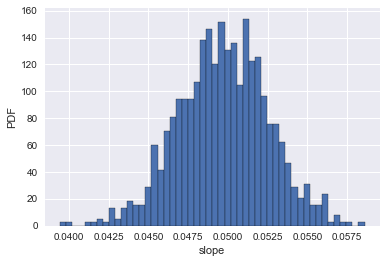

In [58]:
# Pairs bootstrap of literacy/fertility data
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy,fertility,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True,ec='k')
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

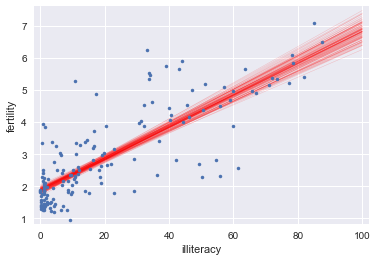

In [59]:
# Plotting bootstrap regressions
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy,fertility,marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Chap 3: Hypothesis testing

In [60]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [61]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

### Formulating and simulating a hypothesis

In [62]:
# ECDFs of swing state election results
df_swing = pd.read_csv('datasets/2008_swing_states.csv')
dem_share_PA = df_swing['dem_share'][df_swing.state=='PA']
dem_share_OH = df_swing['dem_share'][df_swing.state=='OH']

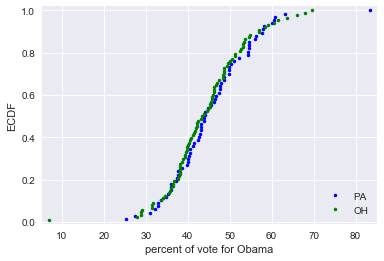

In [63]:
ecdf_PA_x, ecdf_PA_y = ecdf(dem_share_PA)
ecdf_OH_x, ecdf_OH_y = ecdf(dem_share_OH)
_ = plt.plot(ecdf_PA_x,ecdf_PA_y,marker='.',linestyle='none',color='blue',label='PA')
_ = plt.plot(ecdf_OH_x,ecdf_OH_y,marker='.',linestyle='none',color='green',label='OH')
plt.legend(loc='lower right')
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [64]:
# Percent vote for Obama
print('mean: {:>22.2f}%, {:2.2f}%, {:2.2f}%'.
      format(np.mean(dem_share_PA),np.mean(dem_share_OH),
            np.abs(np.mean(dem_share_PA)-np.mean(dem_share_OH))))
print('median: {:>20.2f}%, {:2.2f}%, {:2.2f}%'.
      format(np.median(dem_share_PA),np.median(dem_share_OH),
            np.abs(np.median(dem_share_PA)-np.median(dem_share_OH))))
print('standard deviation: {:>7.2f}%, {:2.2f}%, {:2.2f}%'.
      format(np.std(dem_share_PA),np.std(dem_share_OH),
            np.abs(np.std(dem_share_PA)-np.std(dem_share_OH))))

mean:                  45.48%, 44.32%, 1.16%
median:                44.03%, 43.67%, 0.36%
standard deviation:    9.73%, 9.84%, 0.11%


In [65]:
# Simulating the hypothesis
# Generating a permutation sample

dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))
dem_share_perm = np.random.permutation(dem_share_both)
perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

In [66]:
# EXERCISES

In [67]:
# Generating a permutation sample
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[len(data1):]
    perm_sample_2 = permuted_data[:len(data1)]

    return perm_sample_1, perm_sample_2

In [68]:
# Visualizing permutation sampling
rainfall = pd.read_csv('datasets/sheffield_weather_station.csv',header=8,sep='\s+')
rain_july = rainfall['rain'][rainfall.mm == 6]
rain_november = rainfall['rain'][rainfall.mm == 11]

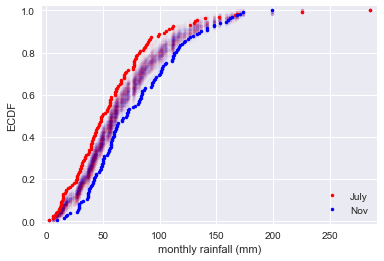

In [69]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_july,rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red',label='July')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue',label='Nov')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.legend(loc='lower right')
plt.show()

### Test statistics and p-values

In [70]:
np.mean(perm_sample_PA) - np.mean(perm_sample_OH)

-0.59576662143825843

In [71]:
np.mean(dem_share_PA) - np.mean(dem_share_OH) # orig. data

1.1582360922659518

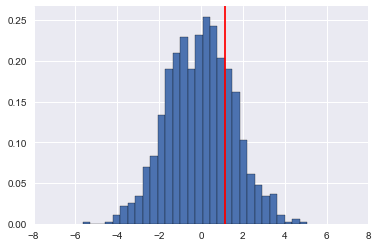

In [72]:
diff_orig = np.mean(dem_share_PA) - np.mean(dem_share_OH)
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))
diff = np.empty(1000)
for i in range(1000):
    dem_share_perm = np.random.permutation(dem_share_both)
    perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
    perm_sample_OH = dem_share_perm[len(dem_share_PA):]
    diff[i] = np.mean(perm_sample_PA) - np.mean(perm_sample_OH)
    
plt.hist(diff,bins=30,normed=True,ec='k')
plt.xlim([-8,8])
plt.axvline(diff_orig,color='red')
plt.show()

In [73]:
# EXERCISES

In [74]:
# Generating permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [75]:
# impact force and adhesive force of the frog's tongue 
# Look before you leap: EDA before hypothesis testing
df = pd.read_csv('datasets/frog_tongue.csv',header=14,usecols=['ID','impact force (mN)'])
df.columns = ['ID','impact_force']
df = df[(df.ID=='II') | (df.ID=='IV')]
df.impact_force /= 1000
df.replace(to_replace='II',value='A',inplace=True)
df.replace(to_replace='IV',value='B',inplace=True)

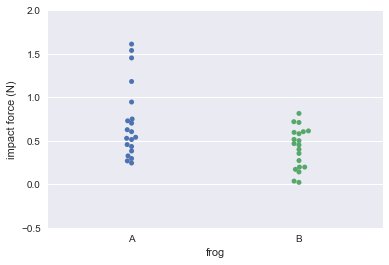

In [76]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID',y='impact_force',data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')
plt.ylim([-0.5,2])
# Show the plot
plt.show()

In [77]:
# Permutation test on frog data
force_a = df['impact_force'][df.ID=='A'].values
force_b = df['impact_force'][df.ID=='B'].values

In [78]:
np.mean(force_a), np.mean(force_b), np.mean(force_a) - np.mean(force_b)

(0.70735000000000015, 0.41910000000000008, 0.28825000000000006)

In [79]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0043


### Bootstrap hypothesis tests

In [80]:
michelson_value = 299852
newcomb_value = 299860

In [81]:
michelson_shifted = michelson_speed_of_light - np.mean(michelson_speed_of_light) + newcomb_value
np.mean(michelson_shifted)

299860.0000000005

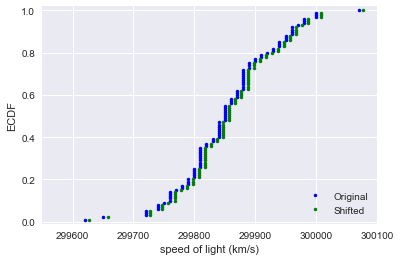

In [82]:
ecdf_michelson_x, ecdf_michelson_y = ecdf(michelson_speed_of_light)
ecdf_michelson2_x, ecdf_michelson2_y = ecdf(michelson_shifted)
_ = plt.plot(ecdf_michelson_x,ecdf_michelson_y,marker='.',
             linestyle='none',color='blue',label='Original')
_ = plt.plot(ecdf_michelson2_x,ecdf_michelson2_y,marker='.',
             linestyle='none',color='green',label='Shifted')
plt.legend(loc='lower right')
plt.xlabel('speed of light (km/s)')
plt.ylabel('ECDF')
plt.xlim([299550,300100])
plt.margins(0.02)
plt.show()

In [83]:
def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value

diff_observed = diff_from_newcomb(michelson_speed_of_light)
diff_observed

-7.599999999976717

In [84]:
bs_replicates = draw_bs_reps(michelson_shifted,diff_from_newcomb, 10000)
p_value = np.sum(bs_replicates <= diff_observed) / 10000
p_value

0.16300000000000001

In [85]:
# EXERCISES

In [86]:
# A one-sample bootstrap hypothesis test
# mean strike force of Frog B is equal to that of Frog C

In [87]:
force_c_mean = 0.55

# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + force_c_mean

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0063


Low p-value suggests that the frog B and frog C do not have the same impact force.

In [88]:
# A bootstrap test for identical distributions
# Frog A and Frog B have identically distributed impact forces

In [89]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a,force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.007


The two distributions are not identical

In [90]:
# A two-sample bootstrap hypothesis test for difference of means.
# Frog A and Frog B have the same mean impact force, 
# but not necessarily the same distribution

In [91]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= (np.mean(force_a)-np.mean(force_b))) / len(bs_replicates)
print('p-value =', p)

p-value = 0.005


# Chap 4: Hypothesis test examples

In [92]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### A/B testing

In [93]:
# Generating permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [94]:
# Permutation test of clicks through
clickthrough_A = np.array([1] * 45 + [0] * 455)
clickthrough_B = np.array([1] * 67 + [0] * 433)

In [95]:
# clickthrough_A, clickthrough_B: arr. of 1s and 0s
def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

diff_frac_obs = diff_frac(clickthrough_A, clickthrough_B)

In [96]:
perm_replicates = np.empty(10000)
for i in range(10000):
    perm_replicates[i] = draw_perm_reps(
        clickthrough_A, clickthrough_B, diff_frac)

p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000
p_value

0.017399999999999999

Low p-value means change in strategy led to change in performance.

In [97]:
# EXERCISES

In [98]:
# The vote for the Civil Rights Act in 1964
# hypothesis: party of a House member has no bearing on his or her vote

In [99]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yay_dems(dems, reps):
    """Compute fraction of Democrat yay votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0044


In [100]:
# A time-on-website analog
# A/B test: determine if these rule changes 
# resulted in a slower rate of no-hitters
# (i.e., longer average time between no-hitters) 
df = pd.read_csv('datasets/mlb_nohitters.csv',usecols=['game_number']).diff(1) - 1
df['game_number'] = df['game_number'].fillna(-1).astype(int)
nht_dead = df['game_number'].iloc[:91].values
nht_live = df['game_number'].iloc[91:].values

In [101]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead,nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead,nht_live,diff_of_means,10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =',p)

p-val = 0.0006


p-value of 0.0006 means only 6 out of 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.006.

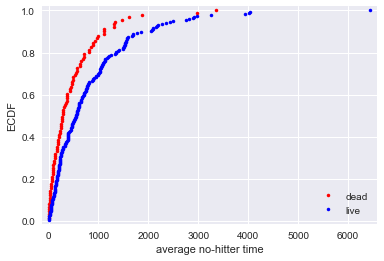

In [102]:
# ECDFs of two no-hitter eras
dead_x, dead_y = ecdf(nht_dead)
live_x, live_y = ecdf(nht_live)

_ = plt.plot(dead_x, dead_y, marker='.', linestyle='none', color='red',label='dead')
_ = plt.plot(live_x, live_y, marker='.', linestyle='none', color='blue',label='live')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('average no-hitter time')
_ = plt.ylabel('ECDF')
plt.legend(loc='lower right')
plt.show()

Doing the EDA is always a good idea to do first! We see by eye that the null hypothesis that the distributions are the same is almost certainly not true.

### Test of correlation

In [103]:
# 2008 US swing state election results
df_swing = pd.read_csv('datasets/2008_swing_states.csv')
total_votes = df_swing['total_votes'].values
dem_share = df_swing['dem_share'].values

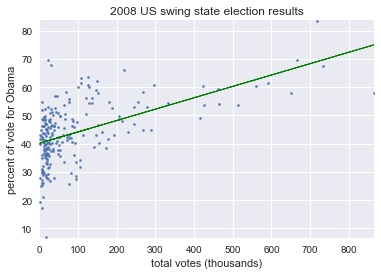

In [104]:
sns.set()
plt.scatter(x=df_swing['total_votes']/1000,
            y='dem_share',data=df_swing,
            s=20,marker='.')
plt.xlabel('total votes (thousands)')
plt.ylabel('percent of vote for Obama')
plt.title('2008 US swing state election results')
plt.plot(df_swing['total_votes']/1000,
         (df_swing['total_votes'])*slope+intercept, 
         color='green',linewidth=1)
plt.margins(0.002)
plt.show()

Hypothesis test of correlation  
- Null hypothesis: the two variables are completely uncorrelated
- Simulate data assuming null hypothesis is true
- Use Pearson correlation, ρ, as test statistic
- Compute p-value as fraction of replicates that have ρ at least as large as observed.

In [105]:
pearson_r(total_votes,dem_share)

0.53619736495867809

In [106]:
# Compute observed correlation: r_obs
r_obs = pearson_r(total_votes,dem_share)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute total_votes measurments: total_votes_permuted
    total_votes_permuted = np.random.permutation(total_votes)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(total_votes_permuted,dem_share)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

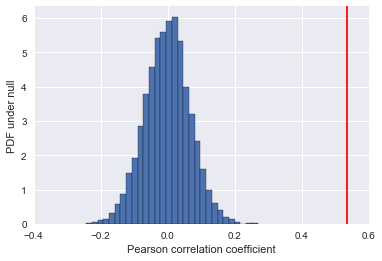

In [107]:
plt.hist(perm_replicates,bins=30,normed=True,ec='k')
plt.axvline(r_obs,color='red')
plt.xlim([-0.4,0.6])
plt.xlabel('Pearson correlation coefficient')
plt.ylabel('PDF under null')
plt.show()

In [108]:
# EXERCISES

In [109]:
# Simulating a null hypothesis concerning correlation
# correlation between female illiteracy and fertility

In [110]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


In [111]:
# Do neonicotinoid insecticides have unintended consequences?

# Effects of neonicotinoids on the sperm of pollinating bees
# how the pesticide treatment affected the count of live 
# sperm per half milliliter of semen

In [113]:
df = pd.read_csv('datasets/bee_sperm.csv',header=3)
control = df['Alive Sperm Millions'][:208].values * 2
treated = df['Alive Sperm Millions'][208:].values * 2

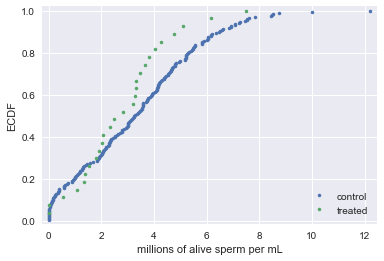

In [114]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()


Nice plot! The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm. Let's now do a hypothesis test in the next exercise.

In [115]:
# Bootstrap hypothesis test on bee sperm counts

# hypothesis: On average, male bees treated with neonicotinoid 
# insecticide have the same number of active sperm per milliliter 
# of semen than do untreated male bees

# test statistic: difference of means

In [116]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control,treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.087


Nice work! The p-value is small, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed.  
So hypothesis is wrong. Control bees don't have the same mean as treated bees.

# Chap 5: Case study

Every year for the past 40-plus years, Peter and Rosemary Grant have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. Use the skills in statistical inference on it.

In [117]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Finch beaks and the need for statistics

Steps:  
- EDA of beak depths in 1975 and 2012
- Parameter estimates of mean beak depth
- Hypothesis test: did the beaks get deeper?

In [119]:
# EDA of beak depths of Darwin's finches
df1 = pd.read_csv('datasets/finch_beaks_1975.csv',usecols=['Beak depth, mm'])[316:]
df1.columns = ['beak_depth']
df1['year'] = 1975
df2 = pd.read_csv('datasets/finch_beaks_2012.csv',usecols=['bdepth'])[121:]
df2.columns = ['beak_depth']
df2['year'] = 2012
df = pd.concat([df1,df2],ignore_index=True)

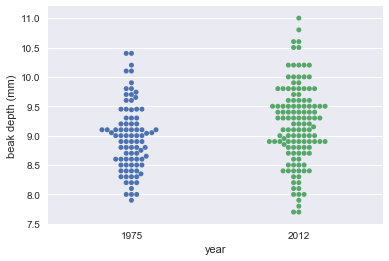

In [120]:
# Create bee swarm plot
_ = sns.swarmplot(x='year',y='beak_depth',data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

In [121]:
# ECDFs of beak depths
bd_1975 = df1['beak_depth'].values
bd_2012 = df2['beak_depth'].values

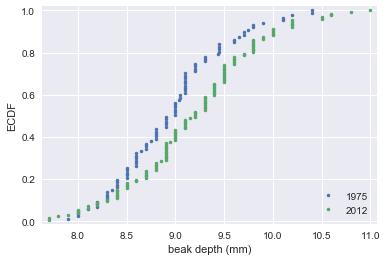

In [122]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

In [123]:
# Parameter estimates of beak depths

# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.226220472441 mm
95% confidence interval = [ 0.0598325   0.39454306] mm


In [124]:
# Hypothesis test: Are beaks deeper in 2012?

# what is the probability that we would get the observed difference in mean beak depth if the means were the same?
# we are not testing that the beak depths come from the same distribution. For that we could use a permutation test.
# The hypothesis is that the means are equal.

# To perform this hypothesis test, 
# we need to shift the two data sets so that they have the same mean and 
# then use bootstrap sampling to compute the difference of means.

In [125]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0029


We get a p-value of 0.0034, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

### Variation of beak shapes

In [126]:
# A function to do pairs bootstrap
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [127]:
# EXERCISES

In [128]:
# EDA of beak length and depth
df1 = pd.read_csv('datasets/finch_beaks_1975.csv',usecols=['Beak length, mm'])[316:]
df1.columns = ['beak_length']
df1['year'] = 1975
df2 = pd.read_csv('datasets/finch_beaks_2012.csv',usecols=['blength'])[121:]
df2.columns = ['beak_length']
df2['year'] = 2012
df = pd.concat([df1,df2],ignore_index=True)

In [129]:
bl_1975 = df1['beak_length'].values
bl_2012 = df2['beak_length'].values

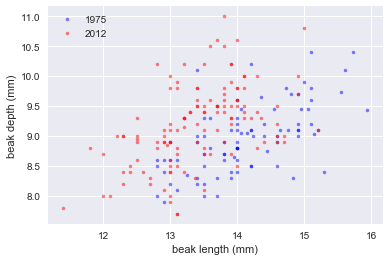

In [130]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

In [131]:
# Linear regressions
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975,bd_1975,1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012,bd_2012,1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5,97.5])

# Print the results
print('1975: slope =', slope_1975,'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,'conf int =', intercept_conf_int_2012)

1975: slope = 0.465205169161 conf int = [ 0.3352736   0.59341659]
1975: intercept = 2.39087523658 conf int = [ 0.59411878  4.25522312]
2012: slope = 0.462630358835 conf int = [ 0.33105727  0.59100642]
2012: intercept = 2.97724749824 conf int = [ 1.31659991  4.7670964 ]


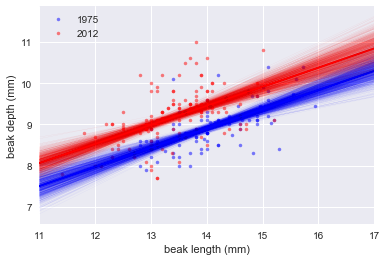

In [132]:
# EXTRA: DRAW THE LINEAR REG LINE WITH CONFIDENCE INTERVALS.
x=[11,17]
_ = plt.plot(bl_1975, bd_1975, marker='.',linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bl_2012, bd_2012, marker='.',linestyle='none', color='red', alpha=0.5)
plt.plot(x, np.multiply(slope_1975,x)+intercept_1975, color='blue')
plt.plot(x, np.multiply(slope_2012,x)+intercept_2012, color='red')

for i in range(1000):
    plt.plot(x,np.multiply(x,bs_slope_reps_1975[i])+
             bs_intercept_reps_1975[i],color='blue',
             alpha=0.1,linewidth=0.2)
    plt.plot(x,np.multiply(x,bs_slope_reps_2012[i])+
             bs_intercept_reps_2012[i],color='red',
             alpha=0.1,linewidth=0.2)
    
plt.xlim([11,17])
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')
plt.show()

It looks like they have the same slope, but different intercepts. Slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years

In [133]:
# Beak length to depth ratio
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012,np.mean,10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.57888237719 conf int = [ 1.55713431  1.6008973 ]
2012: mean ratio = 1.46583422768 conf int = [ 1.44421176  1.4874155 ]


mean beak length to depth ratio was 1.58 in 1975 and 1.47 in 2012. The low end of the 1975 99% confidence interval was 1.56 mm and the high end of the 99% confidence interval in 2012 was 1.49 mm.  
The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

### Calculation of heritability

In [ ]:
# EXERCISES

In [134]:
# EDA of heritability
bd_parent_scandens = pd.read_csv('datasets/scandens_beak_depth_heredity.csv',
                                 usecols=['mid_parent'])['mid_parent'].values
bd_offspring_scandens = pd.read_csv('datasets/scandens_beak_depth_heredity.csv',
                                 usecols=['mid_offspring'])['mid_offspring'].values
bd_parent_fortis = pd.DataFrame.mean(pd.read_csv(
    'datasets/fortis_beak_depth_heredity.csv',usecols=['Male BD','Female BD']),axis=1).values
bd_offspring_fortis = pd.read_csv('datasets/fortis_beak_depth_heredity.csv',
                                  usecols=['Mid-offspr'])['Mid-offspr'].values

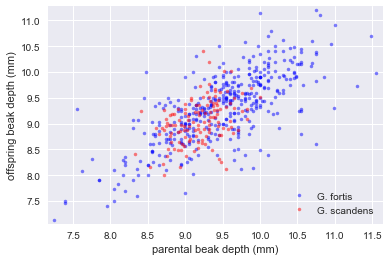

In [135]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We quantify this correlation next.

In [136]:
# Correlation of offspring and parental data

In [137]:
# Function to calculate boostrap Pearson correlation coefficient
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for any given function func."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds,len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x,bs_y)

    return bs_replicates

In [138]:
# Pearson correlation of offspring and parental data
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens,bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis,bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(
    bd_parent_scandens,bd_offspring_scandens,pearson_r,1000)
bs_replicates_fortis = draw_bs_pairs(
    bd_parent_fortis,bd_offspring_fortis,pearson_r,1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.41170636294 [ 0.27222724  0.53500311]
G. fortis: 0.728341239552 [ 0.66988502  0.77776152]


It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

In [139]:
# Measuring heritability
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens,bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis,bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis,bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.548534086869 [ 0.35620272  0.75551925]
G. fortis: 0.722905191144 [ 0.65369765  0.79096532]


Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

In [140]:
# Is beak depth heritable at all in *G. scandens*?

# hypothesis: heritability was just achieved by chance
# beak depth is actually not really heritable in the species.

In [141]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


We get a p-value of zero, which means that none of the 10,000 permutation pairs replicates we drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. 

If we like, we can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability we might expect by chance.